# Math 425 Computation Linear Algebra
## Final Project, Problem 2. 



### Reworked to use SVD and sort features by indicator score.

#### Brent A. Thorne brentathorne@gmail.com

In [41]:
import matplotlib.pyplot as plt
import numpy as np
import os
plt.rcParams['figure.figsize'] = [8, 8]
plt.rcParams.update({'font.size': 12})

# Lambda converter
clinicalResult = lambda c: 1 if c == b'M' else -1 # numpy.loadtxt see a char as binary

# Load dataset
D = np.loadtxt(os.path.join('.','data','train.data'), delimiter=',', converters = {1:clinicalResult})
b = D[:,1] # clinical results 
A = D[:,2:] # chop off the id and clinical result to form our data set

# Load validation set
Dv = np.loadtxt(os.path.join('.','data','validate.data'), delimiter=',', converters = {1:clinicalResult})
bv = Dv[:,1] # clinical results 
Av = Dv[:,2:] # chop off the id and clinical result to form our data set

# Solve Ax=b using SVD
U, S, VT = np.linalg.svd(A,full_matrices=0)
x = VT.T @ np.linalg.inv(np.diag(S)) @ U.T @ b

In [63]:
# Test our training set
b_hat = A @ x
b_hat = 2*np.heaviside(b_hat,1)-1

nSet = b_hat.shape[0]
nErrors = nSet-sum(abs(b+b_hat)/2)
print(f'{nErrors} errors out of {nSet}.')

14.0 errors out of 300.


In [57]:
# Test our validation set
bv_hat = Av @ x
bv_hat = 2*np.heaviside(bv_hat,1)-1

nSet = bv_hat.shape[0]
nErrors = nSet-sum(abs(bv+bv_hat)/2)
print(f'{nErrors} errors out of {nSet}.')

8.0 errors out of 260.


### Now for something different...

Singular values are <1 after k=12.


array([1.12204488, 0.91646785])

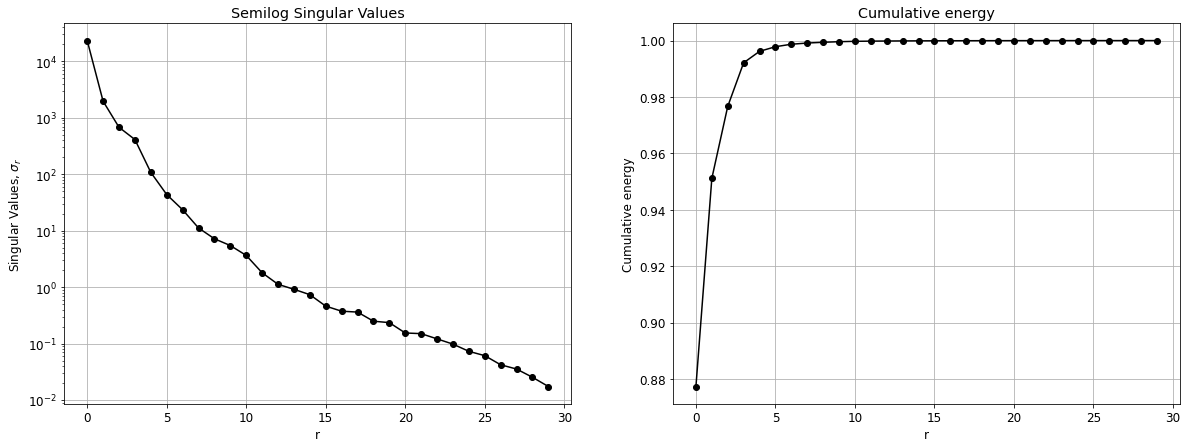

In [131]:
# Plot Sigma
"""
plt.semilogy(S,'-o',color='k')
plt.title("Log($sigma_i$) vs k=i")
plt.xlabel("k (int)")
plt.ylabel("Log($sigma_i$) (Mag)")
plt.grid()
"""
fig1 = plt.figure(figsize=(20,7))
ax1 = fig1.add_subplot(121)
ax1.semilogy(S,'-o',color='k')
ax1.grid()
ax2 = fig1.add_subplot(122)
ax2.plot(np.cumsum(S)/np.sum(S),'-o',color='k')
ax2.grid()

ax1.set_title('Semilog Singular Values')
ax1.set_xlabel('r')
ax1.set_ylabel('Singular Values, $\sigma_r$')
ax2.set_title('Cumulative energy')
ax2.set_xlabel('r')
ax2.set_ylabel('Cumulative energy')
print("Singular values are <1 after k=12.")
S[12:14]

In [11]:
# Generate feature labels
params = ["radius", "texture", "perimeter","area","smoothness","compactness","concavity","concavePoints","symmetry","fractalDimension"];
stats = ["(mean)", "(stderr)", "(worst)"]
L = [ p+s for p in params for s in stats ]

proj_x on span(rowA) == proj_x on span(colA): True


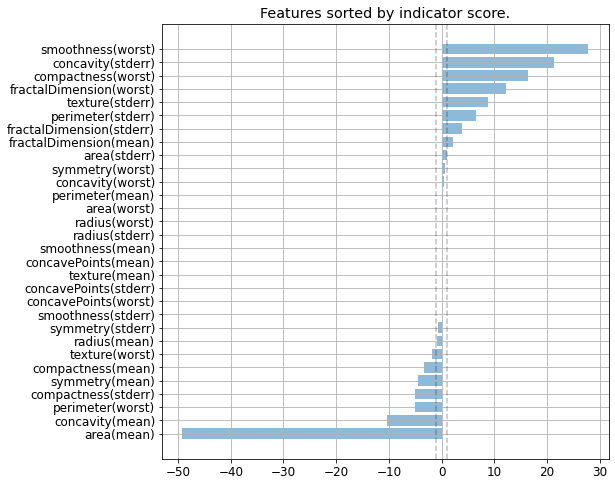

Some feature are strong positive and strong negative indicators, others give little indication at all. Vertical dotted lines are shown at +/- 1 (score).


In [108]:
# Order the features by how strongly they indicate the clinical result
featureScoreV = VT.transpose() @ VT @ x # colloralation of x by proj_x on span(rowA). 
featureScore = U.T @ U @ x  # colloralation of x by proj_x on span(colA). 

# Compare hash of collaraltion to show they are the same thing
precision = 12; 
print(f'proj_x on span(rowA) == proj_x on span(colA): \
{np.round(sum(featureScoreV),precision) == np.round(sum(featureScore),precision)}') 

# Sort features
fdict = {i:featureScore[i] for i in range(len(featureScore))}
fmap = sorted(fdict.items(), key=lambda item: item[1])
fnames = [L[f[0]] for f in fmap ]
fvals = [f[1] for f in fmap ]

# Plot feature scores
plt.barh(range(len(fvals)), fvals, align='center', alpha=0.5)
plt.yticks(range(len(fvals)),fnames)
plt.axvline(-1, color='black', linestyle='--',alpha=0.25)
plt.axvline(1, color='black', linestyle='--', alpha=0.25)
plt.title('Features sorted by indicator score.')
plt.grid()
plt.show()

print("Some feature are strong positive and strong negative indicators, \
others give little indication at all. Vertical dotted lines are shown at +/- 1 (score).")

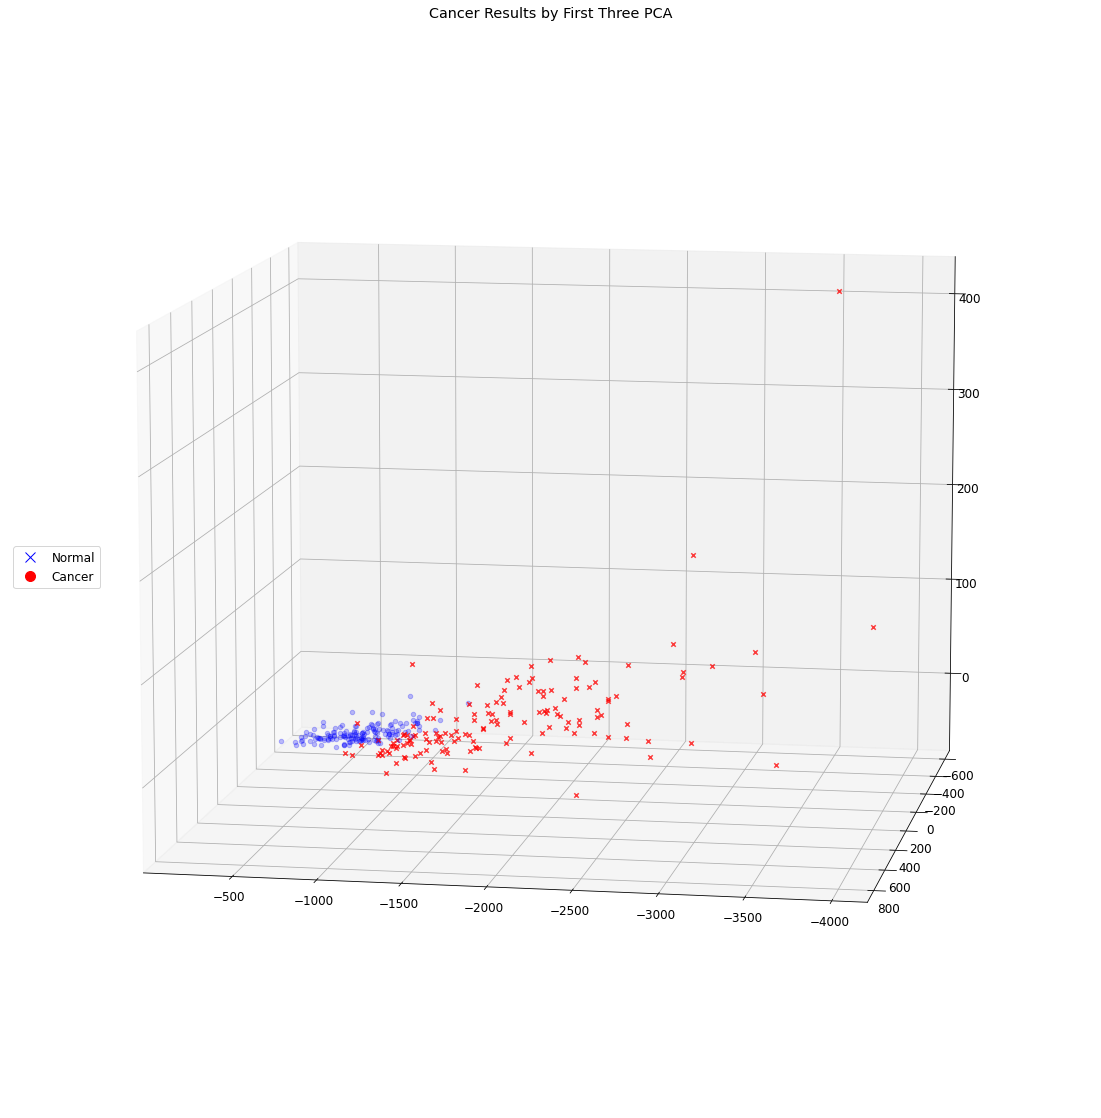

In [172]:
# Compute and show PCA
import matplotlib.lines as mlines
import matplotlib.pyplot as plt
blue_circle = mlines.Line2D([], [], color='blue', marker='x', linestyle='None',
                          markersize=10, label='Normal')
red_x = mlines.Line2D([], [], color='red', marker='o', linestyle='None',
                          markersize=10, label='Cancer')

fig2 = plt.figure(figsize=(50,20))
ax = fig2.add_subplot(111, projection='3d')
ax1 = []
ax2 = []
for j in range(A.shape[0]):
    x = VT[0,:] @ A[j,:].T
    y = VT[1,:] @ A[j,:].T
    z = VT[2,:] @ A[j,:].T
    
    if b[j] == 1: #Cancer
        ax.scatter(x,y,z,marker='x',color='r',s=20, alpha=0.75)
    else:
        ax.scatter(x,y,z,marker='o',color='b',s=20, alpha=0.25)

ax.legend(handles=[blue_circle, red_x], loc='center left')
ax.set_title('Cancer Results by First Three PCA')
ax.view_init(10,100)
plt.show()